# Bayesian Estimation Utilities Notebook

- Common estimations covered here:
    1. Normal-Gamma posterior predictive

In [179]:
%run -m ipy_startup
%run -m ipy_seaborn
%run -m ipy_plotly
%matplotlib inline

# Normal-Gamma

Useful when estimating the distribution of a sample with unknown mean and variance

### Posterior Predictive

In [136]:
from scipy import stats
from ml.bayesian import estimations

# Define a sample:
x = [10., 13., 19.]
x

[10.0, 13.0, 19.0]

In [120]:
x = np.array([1., 2.3, 3.])
(x - np.mean(x))**2

array([ 1.21,  0.04,  0.81])

In [397]:
# Gamma draw tests
#v = stats.gamma(a=.1, scale=100.).rvs(size=10000)
#v = stats.gamma(a=.3, scale=1000.).rvs(size=10000)
gamma_mean = 1/(1.**2)
a = .5
b = gamma_mean / a
print('mean = ', gamma_mean, 'b = ', b)
v = np.random.gamma(a, scale=b, size=10000)
#v = np.log(1/v)
v = np.sqrt(1/v)
#v = 1/v
pd.Series(v).iplot(kind='histogram')
pd.Series(v).describe()

mean =  1.0 b =  2.0


count    10000.000000
mean         9.449588
std        154.584284
min          0.230571
25%          0.877321
50%          1.503895
75%          3.133476
max      11203.024580
dtype: float64

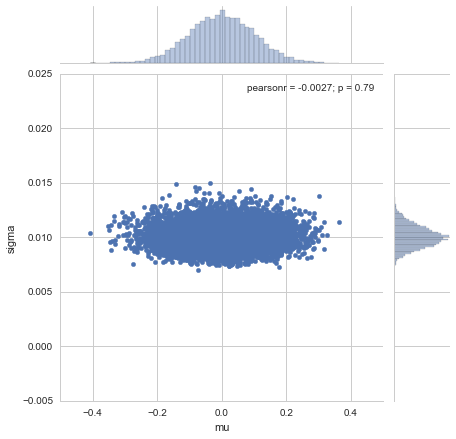

In [152]:
# Select prior
u0 = 0.
k0 = 1.
a0 = 100.
b0 = .9999999999

# Draw from prior
n = 10000

# Scipy stats gamma is parameterized as specified in https://en.wikipedia.org/wiki/Gamma_distribution
# where the "k" parameter is the argument `a` and the "scale" parameters is the argument `scale`
#gt = stats.gamma(a=a0, scale=b0).rvs(size=n)
sigma = np.random.gamma(a0, scale=b0, size=n)
#eps = 1E-16
#sigma = np.clip(sigma, eps, 1/eps)
sigma = 1/(k0 * sigma)

# Scipy stats norm is parameterized with scale equal to standard deviation (and 
# the gamma distribution draw times k0 is the variance, so the sqrt must be taken)
#mu = stats.norm.rvs(loc=np.repeat(u0, n), scale=np.repeat(1., n))#np.sqrt(sigma))
mu = np.array([np.random.normal(loc=u0, scale=np.sqrt(s), size=1)[0] for s in sigma])

# Plot mu + sigma draws
sns.jointplot(x=mu, y=sigma).set_axis_labels('mu', 'sigma')

In [146]:
pd.Series(sigma).describe()

count    10000.000000
mean        15.531647
std        756.157990
min          0.084290
25%          0.727360
50%          1.449351
75%          3.598405
max      75064.544017
dtype: float64

In [147]:
pd.Series(mu).describe()

count    10000.000000
mean         0.079633
std          4.937980
min        -85.552980
25%         -0.819331
50%          0.011729
75%          0.840270
max        414.187280
dtype: float64

In [231]:
import imp
imp.reload(estimations)

<module 'ml.bayesian.estimations' from '/Users/eczech/repos/portfolio/functional/ml/python/ml/bayesian/estimations.py'>

12.0 10.0 104.5 103.0 1.08421052632


count    10000.000000
mean        12.011497
std          1.095712
min          7.631023
25%         11.281189
50%         12.015297
75%         12.753510
max         15.956155
dtype: float64

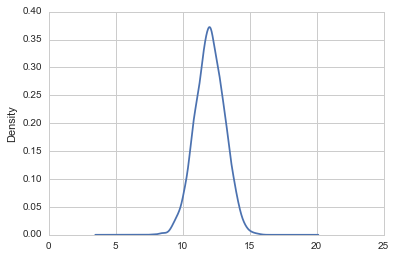

In [156]:
x2 = np.array(list(x) + [13., 13., 13., 13., 13., 13.])
dist = estimations.get_normal_gamma_posterior_predictive(x2, u0, k0, a0, 1/b0)
v = pd.Series(dist.rvs(size=10000))
v.plot(kind='kde')
v.describe()

In [138]:
pd.Series(x).describe()

count     3.000000
mean     14.000000
std       4.582576
min      10.000000
25%      11.500000
50%      13.000000
75%      16.000000
max      19.000000
dtype: float64

In [128]:
x

[10.0, 13.0, 19.0]

## Posterior Visualizations

In [293]:
np.concatenate((np.array([1,2]), np.array([1,3])), axis=0)

array([1, 2, 1, 3])

In [446]:
def get_sample_regularizations(posterior_samp_fn, n=25000):
    np.random.seed(1)
    d_samp = [
        np.random.normal(loc=0., scale=1., size=1),
        np.random.normal(loc=0., scale=1., size=2),
        np.random.normal(loc=0., scale=1., size=5),
        np.random.normal(loc=8., scale=1., size=1),
        np.random.normal(loc=8., scale=1., size=2),
        np.random.normal(loc=8., scale=1., size=5),
        np.random.normal(loc=8., scale=.1, size=1),
        np.random.normal(loc=8., scale=.1, size=2),
        np.random.normal(loc=8., scale=.1, size=5),
        np.concatenate((np.random.normal(loc=8., scale=1., size=3), np.array([-4.])), axis=0),
        np.random.normal(loc=0., scale=10., size=2),
        np.random.normal(loc=0., scale=10., size=3),
        np.random.normal(loc=0., scale=10., size=5),
        np.random.normal(loc=0., scale=10., size=20)
    ]
    d_stat_samp = []
    d_stat_post = []
    for i, s in enumerate(d_samp):
        post_s = posterior_samp_fn(s, n)
        d_stat_samp.append(pd.Series(s).describe())
        d_stat_post.append(pd.Series(post_s).describe())
    return d_samp, pd.DataFrame(d_stat_samp), pd.DataFrame(d_stat_post)

In [295]:
# u0 = 0.
# k0 = 1.
# a0 = 10.
# b0 = .1
# post_fn = lambda x: estimations.get_normal_gamma_posterior_predictive(x, u0, k0, a0, 1/b0)
# d_samp, d_stat_samp, d_stat_post = get_sample_regularizations(post_fn)
# d_stat_post

In [385]:
import imp
imp.reload(estimations)

<module 'ml.bayesian.estimations' from '/Users/eczech/repos/portfolio/functional/ml/python/ml/bayesian/estimations.py'>

In [510]:
u0 = 0.

c1 = .01 # Informativeness
c2 = .001 # Average precision (make smaller to increase default variance)

# Constraints:
# a0 + b0 = c1
# a0/b0 = c2

b0 = c1 / (c2 + 1) # This is a gamma rate, not scale
a0 = (c2 * c1 / (c2 + 1)) 
assert np.allclose(a0 + b0, c1), 'a0 = {}, b0 = {}, c1 = {}'.format(a0, b0, c1)
assert np.allclose(a0/b0, c2), 'a0 = {}, b0 = {}, c2 = {}'.format(a0, b0, c2)

# a0 = .001
# b0 = 1.

print('a0 = {}, b0 = {}'.format(a0, b0))

# def get_samples(x, n):
#     dist = estimations.get_normal_gamma_variance_posteriors(x, np.mean(x), a0, b0)[1]
#     return dist.rvs(size=n)

def get_samples(x, n):
    dist = estimations.get_normal_gamma_variance_posteriors(x, np.mean(x), a0, b0)[0]
    rho = dist.mean()
    print('rho = {}, var = {}, std = {}'.format(rho, 1/rho, np.sqrt(1/rho)))
    return np.random.normal(loc=np.mean(x), scale=np.sqrt(1/rho), size=n)

# def get_samples(x, n):
#     dist = estimations.get_normal_gamma_variance_posteriors(x, np.mean(x), a0, b0)[0]
#     return np.sqrt(1/dist.rvs(size=n))

d_samp, d_stat_samp, d_stat_post = get_sample_regularizations(get_samples)
d_stat_post

a0 = 9.990009990009992e-06, b0 = 0.009990009990009992
rho = 50.050999999999995, var = 0.019979620786797467, std = 0.14134928647431322
rho = 85.20433789473833, var = 0.011736491647120158, std = 0.10833508963913842
rho = 0.4819003943229713, var = 2.0751176213601448, std = 1.4405268554803636
rho = 50.050999999999995, var = 0.019979620786797467, std = 0.14134928647431322
rho = 1.3472148587655701, var = 0.7422720982429505, std = 0.8615521448194244
rho = 0.9062543099689931, var = 1.1034430280769802, std = 1.0504489650035267
rho = 50.050999999999995, var = 0.019979620786797467, std = 0.14134928647431322
rho = 82.602159536249, var = 0.012106221019090445, std = 0.11002827372584942
rho = 98.04343690730641, var = 0.010199560843072381, std = 0.10099287520945416
rho = 0.036404420761464704, var = 27.46919135322525, std = 5.2411059284491905
rho = 0.08959356334500974, var = 11.161516102994678, std = 3.3408855267720083
rho = 0.03687907707590306, var = 27.115646032622767, std = 5.207268576962664
rho = 0

,count,mean,std,min,25%,50%,75%,max
0,25000.0,1.625248,0.141404,1.069194,1.529994,1.625512,1.719683,2.213506
1,25000.0,-0.569747,0.108484,-1.028564,-0.642933,-0.569460,-0.496953,-0.177512
2,25000.0,-0.310821,1.437543,-6.538096,-1.291080,-0.310594,0.662308,5.150127
3,25000.0,8.321325,0.140421,7.767029,8.227335,8.321230,8.414962,8.892287
4,25000.0,8.607530,0.862394,5.285858,8.027561,8.606724,9.191072,12.010664
5,25000.0,7.455415,1.042251,3.061363,6.744109,7.454197,8.158105,11.650126
6,25000.0,7.982858,0.141531,7.427101,7.887042,7.982558,8.079614,8.599067
7,25000.0,7.959463,0.109371,7.563460,7.885039,7.959086,8.032885,8.380985
8,25000.0,8.040340,0.101560,7.616709,7.971624,8.039608,8.108873,8.498209
9,25000.0,5.018385,5.273117,-15.993749,1.524968,5.007772,8.553916,26.257036


In [509]:
traces = []

def get_posterior_fig(d_samp, d_stat_samp, d_stat_post, use_percentiles=True):
    x = np.arange(len(d_samp))

    def get_mean_sd_summary(d, prefix, marker1, marker2, offset=0):
        r = []
        r.append(go.Scatter(x=x+offset, y=d['mean'] - d['std'], name='{} Mean - 1SD'.format(prefix), 
                                 mode='markers', marker=marker1))
        r.append(go.Scatter(x=x+offset, y=d['mean'], name='{} Mean'.format(prefix), 
                                 mode='markers', marker=marker2))
        r.append(go.Scatter(x=x+offset, y=d['mean'] + d['std'], name='{} Mean + 1SD'.format(prefix), 
                                 mode='markers', marker=marker1))
        return r
    
    def get_percentile_summary(d, prefix, marker1, marker2, offset=0):
        r = []
        r.append(go.Scatter(x=x+offset, y=d['25%'], name='{} 25%'.format(prefix), 
                                 mode='markers', marker=marker1))
        r.append(go.Scatter(x=x+offset, y=d['50%'], name='{} 50%'.format(prefix), 
                                 mode='markers', marker=marker2))
        r.append(go.Scatter(x=x+offset, y=d['75%'], name='{} 75%'.format(prefix), 
                                 mode='markers', marker=marker1))
        return r
        
    # Add sample statistic summaries
    marker1 = dict(symbol=141, size=10)
    marker2 = dict(symbol=133, size=10)
    if use_percentiles:
        traces.extend(get_percentile_summary(d_stat_samp, 'Sample', marker1, marker2))
    else:
        traces.extend(get_mean_sd_summary(d_stat_samp, 'Sample', marker1, marker2))
        
    # Add posterior statistic summaries
    marker1 = dict(symbol=141, size=10)
    marker2 = dict(symbol=133, size=10)
    if use_percentiles:
        traces.extend(get_percentile_summary(d_stat_post, 'Posterior', marker1, marker2, offset=.2))
    else:
        traces.extend(get_mean_sd_summary(d_stat_post, 'Posterior', marker1, marker2, offset=.2))
        
    # Add actual sample values
    traces.extend([
        go.Scatter(x=np.repeat(i-.2, len(v)), y=v, name='Sample {}'.format(i), mode='markers', opacity=.5, showlegend=False) 
        for i, v in enumerate(d_samp)
    ])
    
    
    fig = go.Figure(data=traces)
    return fig

fig = get_posterior_fig(d_samp, d_stat_samp, d_stat_post, use_percentiles=False)
plty.offline.iplt(fig)

pd.Series([len(v) for v in d_samp]).iplot(kind='bar')

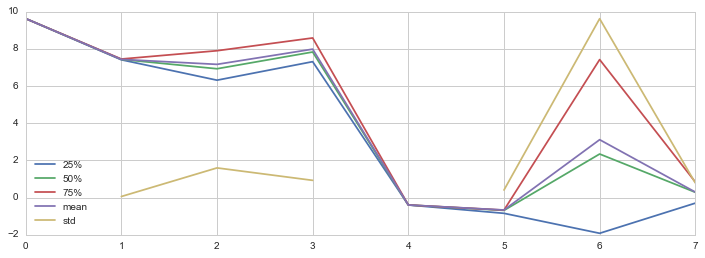

In [176]:
plt.figure(figsize=(12,4))
ax = ds[['25%', '50%', '75%', 'mean', 'std']].plot(ax=plt.gca())